<a href="https://colab.research.google.com/github/barauna-lo/CAP4213-Deep-Learning/blob/main/CNN_Aprendizado_Profundo_barauna_lo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# **Uso de Rede Convolucional na classificação de extração e não extração de árvores na Floresta Amazônica.**

Prof. Elcio Hideiti Shiguemori

13/10/2021

Neste código, iremos constuir uma Rede Neural Convolucional para prever a classificação de extração e não extração de arvores. 

E este código esta dividito em duas partes.

* 1 - Processamento de Imagens

* 2 - Modelo de Redes Neurais Convolucionais



## Processamento de Imagens

Na célula abaixo iremos importar as bibliotecas que iremos utilizar.

In [1]:
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

Na célula seguinte iremos fazer o donwload das imagens que iremos utilizar no treinamento

In [2]:
#where these data are going???
!gdown --id 16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3

Downloading...
From: https://drive.google.com/uc?id=16qpj4czPFN4GXfTsbNH7hNYMz2LjLmf3
To: /content/covmingrad.rar
100% 2.58M/2.58M [00:00<00:00, 9.74MB/s]


Agora iremos extrair os arquivos que tiverem em ``` covmingrad.rar``` em uma outra pasta. E esta será a pasta de treinamento

In [3]:
!unrar x "/content/covmingrad.rar" "/content/sample_data/treinamento/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/covmingrad.rar

Creating    /content/sample_data/treinamento                          OK
Creating    /content/sample_data/treinamento/non-logging              OK
Extracting  /content/sample_data/treinamento/non-logging/_Id_100000.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100001.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100003.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100011.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100012.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100013.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100014.tif       0%  OK 
Extracting  /content/sample_data/treinamento/non-logging/_Id_100015.tif     

Nesta célula iremos excluir um arquivo. (não sei por que) e em seguida ele esta.... defininfo novas pastas e novamente redefini a função que redimensiona as imagens.

In [5]:
#!/usr/bin/python
from PIL import Image
import os, sys

#rm = removing file (pelo que parece)
!rm "/content/sample_data/treinamento/selective-logging/extrac_Id_1112.tif.aux.xml"


path = "/content/sample_data/treinamento/selective-logging/"
dirs = os.listdir( path )

!mkdir "/content/sample_data/treinamento/selective-logging-resized/"
path2 = "/content/sample_data/treinamento/selective-logging-resized/"
dirs2 = os.listdir( path2 )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((50,50), Image.ANTIALIAS)
            imResize.save(f + ' resized.tiff', 'tiff', quality=90)

resize()

Na célula abaixo iremos vizualizar uma das imagens

In [37]:
import cv2
img=cv2.imread('/content/sample_data/treinamento/non-logging-resized/_Id_100001 resized.tiff')
plt.imshow(img)

A célula abaixo ira criar novas pastas (não entendi o motivo) e irá transformar as imagens de ```.tiff``` para ```.jpg```. (e eu não sei o por que também)


In [ ]:
import os
from PIL import Image
#creating newfolders 
!mkdir "/content/sample_data/treinamento/train/"
!mkdir "/content/sample_data/treinamento/train/non-logging-resized"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/non-logging-resized"

root1 = "/content/sample_data/treinamento/non-logging-resized"
root2 = "/content/sample_data/treinamento/train/non-logging-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

Nesta célula o cóidgo ira criar novamente novas pastas

In [ ]:
import os
from PIL import Image
!mkdir "/content/sample_data/treinamento/train/selective-loggin-resized/"
#yourpath = os.getcwd()
yourpath = "/content/sample_data/treinamento/selective-logging-resized"

root1 = "/content/sample_data/treinamento/selective-logging-resized"
root2 = "/content/sample_data/treinamento/train/selective-loggin-resized"

for root1, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        print(os.path.join(root1, name))
        if os.path.splitext(os.path.join(root1, name))[1].lower() == ".tiff":
            if os.path.isfile(os.path.splitext(os.path.join(root1, name))[0] + ".jpg"):
                print ("A jpeg file already exists for %s" % name)
            # If a jpeg is *NOT* present, create one from the tiff.
            else:
                outfile = os.path.splitext(os.path.join(root2,name))[0] + ".jpg"
                try:
                    im = Image.open(os.path.join(root1, name))
                    print ("Generating jpeg for %s" % name)
                    im.thumbnail(im.size)
                    im.save(outfile, "JPEG", quality=100)
                except (Exception, e):
                    print (e)

In [10]:
img=cv2.imread('/content/sample_data/treinamento/train/selective-loggin-resized/extrac_Id_100004 resized.jpg')
plt.imshow(img)

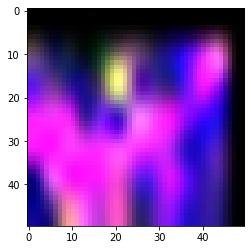

Agora, novas pastas serão criadas para o conjunto de treinamento e teste. E definiremos as pastas com dados de entrada e com os dados de saída. 

Repare que existe alguns pararâmetros nesta célula como o ```seed``` e o ```ratio``` 

In [12]:
!pip install split-folders
import splitfolders

!mkdir "/content/sample_data/train&test"
!mkdir "/content/sample_data/train&test/non-logging-resized"

input_folder = "/content/sample_data/treinamento/train/"
output_folder = "/content/sample_data/treinamento/train&test" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 4324 files [00:00, 7740.97 files/s]


In [13]:
image_size = (50, 50)
batch_size = 32

# PASTA PARA O DATASET DE TREINAMENTO
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/train",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

# PASTA PARA O DATASER DE VALIDAÇÃO
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/sample_data/treinamento/train&test/val",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3459 files belonging to 2 classes.
Using 2768 files for training.


??????

In [15]:
class_names = train_ds.class_names
print(class_names)

['non-logging-resized', 'selective-loggin-resized']


A célula a baixo irá plotar alguma imagens que estão na pasta de treinamento. 

Vou manter a próxima célula comentada. Ela não terá utilidade no nosso teste

In [39]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")



A próxima célula ira construir uma regra chamada de ```data_augmentarion``` que que dependerá da imagem no imput. Dessa forma, cada imagem no modelo sera passará por um flip horizontal, rotacional aleatoriamente e um dar alguns zooms aleatorório.

Depois do comentário plotaremos a imagem para vermos o resultado da função de aumento. 

In [17]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.10)
    ]
)

# Conferindo se a função esta funcionando

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

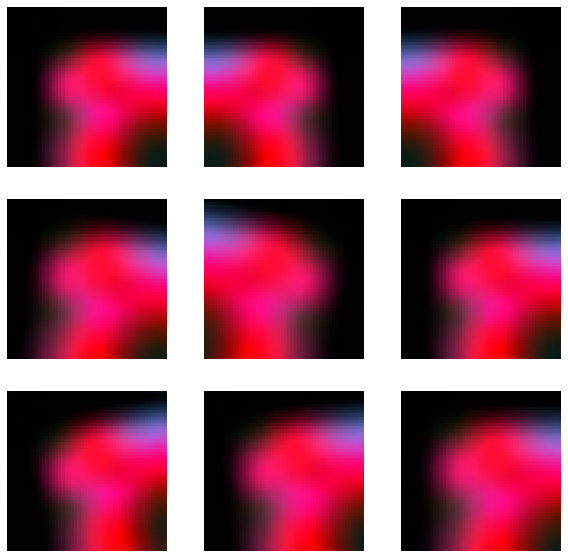

## Modelo de Redes Neurais Convolucionais 

Na célula abaixo iremos constuir o modelo de redens neurais convulucionais. 

In [50]:
keras.backend.clear_session()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)

    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)



In [33]:
model = make_model(input_shape=image_size + (3,), num_classes=2)

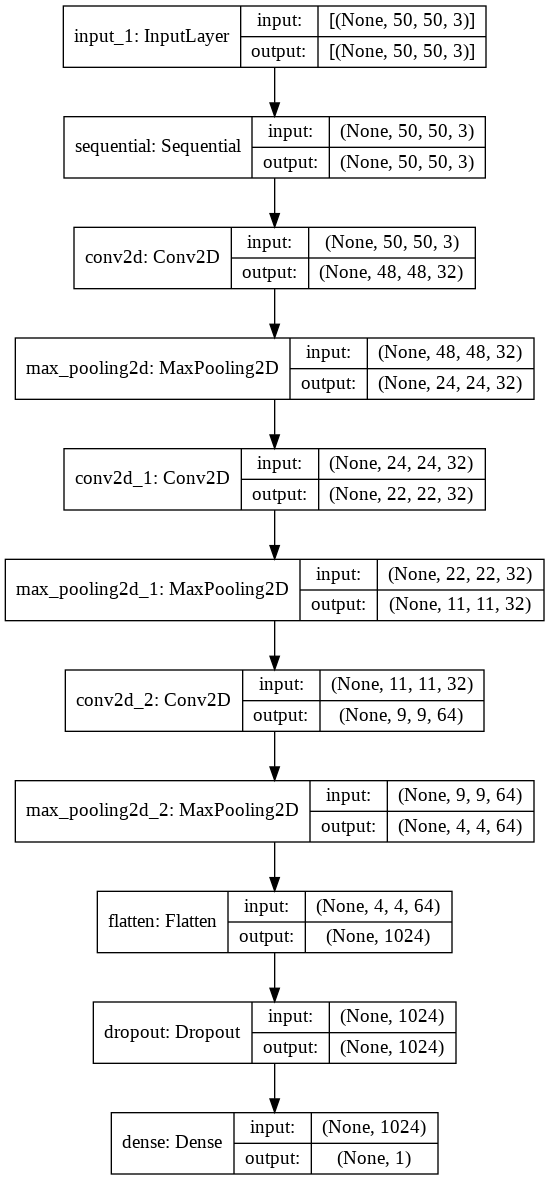

In [34]:
keras.utils.plot_model(model, show_shapes=True)

In [35]:
checkpoint_filepath = '/content/content'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=6,
    verbose=0,
    restore_best_weights = True)

def scheduler(epoch, lr):
  if epoch < 9:
    return lr
  else:
    return lr * tf.math.exp(-0.008)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [36]:
epochs = 100

model.compile(optimizer= keras.optimizers.Adam(),
              loss = 'BinaryCrossentropy',
              metrics = ["accuracy"])

history = model.fit(
    train_ds, epochs = epochs, 
    callbacks = [early_stop, lr_callback],
    validation_data = val_ds)

Epoch 1/100
87/87 [==============================] - 10s 101ms/step - loss: 2.5839 - accuracy: 0.7616 - val_loss: 0.2954 - val_accuracy: 0.8605
Epoch 2/100
87/87 [==============================] - 9s 100ms/step - loss: 0.3520 - accuracy: 0.8573 - val_loss: 0.3137 - val_accuracy: 0.8721
Epoch 3/100
87/87 [==============================] - 9s 100ms/step - loss: 0.3232 - accuracy: 0.8739 - val_loss: 0.3406 - val_accuracy: 0.8721
Epoch 4/100
87/87 [==============================] - 9s 100ms/step - loss: 0.2976 - accuracy: 0.8858 - val_loss: 0.2838 - val_accuracy: 0.8953
Epoch 5/100
87/87 [==============================] - 9s 99ms/step - loss: 0.2900 - accuracy: 0.8869 - val_loss: 0.3043 - val_accuracy: 0.8953
Epoch 6/100
87/87 [==============================] - 9s 99ms/step - loss: 0.2966 - accuracy: 0.8923 - val_loss: 0.3060 - val_accuracy: 0.9070
Epoch 7/100
87/87 [==============================] - 9s 99ms/step - loss: 0.2584 - accuracy: 0.8960 - val_loss: 0.3871 - val_accuracy: 0.8488
E

In [40]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496 

Na proxima célula iremos alocar as listas com valores dos parâmetros rodados em cada modelo e iremos em seguida plotar alguns gráficos

Text(0.5, 1.0, 'Training and Validation Accuracy')

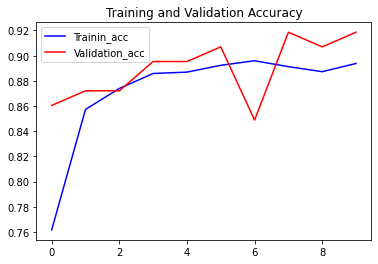

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

#Ploting
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")


Text(0.5, 1.0, 'Training and Validation loss')

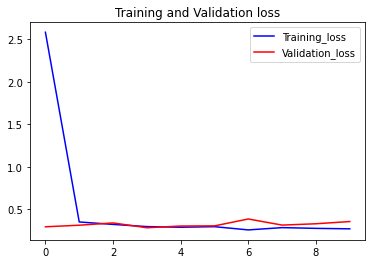

In [48]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [49]:
image_path = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100019 resized.jpg"
image_path2 = "/content/sample_data/treinamento/train&test/test/selective-loggin-resized/extrac_Id_100092 resized.jpg"
image_path3 = "/content/sample_data/treinamento/train&test/test/non-logging-resized/_Id_100003 resized.jpg"
merged_path = [image_path,image_path2,image_path3]

for img_path in merged_path:
    img = keras.preprocessing.image.load_img(
        img_path, target_size=image_size)
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    pred_class = np.argmax(predictions)

    pred_class = class_names[pred_class]

    
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
    print('prediction: ',pred_class)

This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
This image most likely belongs to non-logging-resized with a 100.00 percent confidence.
prediction:  non-logging-resized
